In [1]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_columns', None)
import os


In [2]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
database = pd.read_csv('DATABASE/PNS_2019.csv', sep=';', low_memory = False, memory_map = True)
database.head()


,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,G033,G034,G035,G036,G038,G039,G040,G041,G042,G044,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G057,G058,G05801,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G070,G071,G072,G073,G074,G075,G076,G077,G079,G080,G081,G082,G083,G084,G085,G086,G032,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,K001,K004,K007,K010,K013,K016,K019,K01901,K02001,K02101,K02102,K022,K025,K028,K031,K034,K03401,K03501,K03601,K03602,K04301,K04302,K04401,K045,K046,K047,K048,K050,K051,K052,K05302,K05401,K05402,k055,K05601,K05602,K062,L01701,L01702,L01703,L01704,L01705,L01706,L01707,L01708,L01709,L01710,L01711,L01712,L01713,L01714,L01715,L01716,L018,L019,L021,L022,L023,L024,L025,L026,L027,L028,L029,L030,L031,L032,L033,L034,L035,L036,L037,L038,L039,L040,L042,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P056,P05601,P05602,P05603,P05604,P05605,P057,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q

In [3]:
df = database

In [4]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1063), int64(9), object(15)
memory usage: 2.4+ GB


In [5]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[
   [
      'N00101',
      'N012',
      'P027',
      'P02801',
      'P029',
      'P03303',
      'P03302',
      'P03201',
      'N011',
      'N010',
      'N016',
      'N017',
      'N018',
      'Q092'
   ]
]

df.head()

,N00101,N012,P027,P02801,P029,P03303,P03302,P03201,N011,N010,N016,N017,N018,Q092
0,3.0,2.0,2.0,NaN,5.0,1.0,1.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
traducao = pd.read_json(os.getcwd() + '/Json/DD_Traducao.json')
traducao['Nomes Reduzidos']

J00402     Motivo impedimento atividade habitual últimas 2S
N00101                                      Estado de saúde
N010                                  Problemas para dormir
N011                                  Problemas com cansaço
N012                          Pouco Interesse em atividades
N016                                  Sentimento depressivo
N017                                 Sentimento de fracasso
N018                                        Ideação suicida
P027                        Frequência de consumo de bebida
P02801                         Qtde dias na semana que bebe
P029                                 Qtde doses quando bebe
P03001                   Dirigir embriagado nos últimos 12M
P03201       Mais de 5 doses em uma ocasião nos últimos 30D
P03301    Qtde faltas no trabalho por bebida nos últimos...
P03302          Falta de memória após beber nos últimos 12M
P03303                             Aviso bebida últimos 12M
Q092                               Diagn

In [7]:
df.head()

,N00101,N012,P027,P02801,P029,P03303,P03302,P03201,N011,N010,N016,N017,N018,Q092
0,3.0,2.0,2.0,NaN,5.0,1.0,1.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Renomeando as colunas
df = df.rename(columns=traducao['Nomes Reduzidos'])

In [9]:
def Heatmap(df):
   # Cores de Ausência e presença de dados
   colors = ["#77BA99", "#FAFAF0"]

   # Definindo as cores do Heatmap
   cmap = sns.color_palette(colors)

   #Colocando o gráfico em horizontal
   df_transposto = df.T

   # Criando o mapa
   grafico = sns.heatmap(
      df_transposto.isnull(),
      yticklabels = True,
      xticklabels = False,
      cbar = False,
      cmap = cmap
   )


   # Criando a legenda personalizada com quadradinhos coloridos
   legend_labels = ["Presença", "Ausência"]
   legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
   grafico.legend(legend_patches, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=2, title="Legenda")


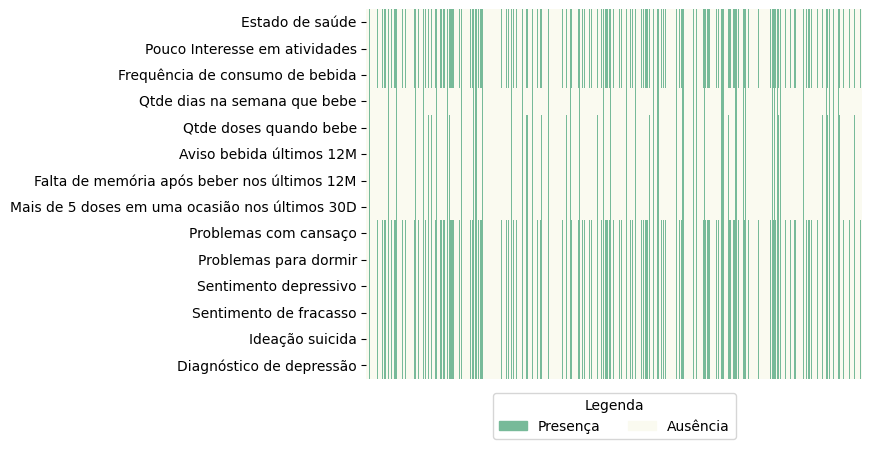

In [10]:
Heatmap(df)

In [11]:
# Converte colunas para número flutuante
df = df.astype(float)
df.dtypes

Estado de saúde                                   float64
Pouco Interesse em atividades                     float64
Frequência de consumo de bebida                   float64
Qtde dias na semana que bebe                      float64
Qtde doses quando bebe                            float64
Aviso bebida últimos 12M                          float64
Falta de memória após beber nos últimos 12M       float64
Mais de 5 doses em uma ocasião nos últimos 30D    float64
Problemas com cansaço                             float64
Problemas para dormir                             float64
Sentimento depressivo                             float64
Sentimento de fracasso                            float64
Ideação suicida                                   float64
Diagnóstico de depressão                          float64
dtype: object

In [12]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0
counts = df['Diagnóstico de depressão'].value_counts()
counts

2.0    82514
1.0     8332
Name: Diagnóstico de depressão, dtype: int64

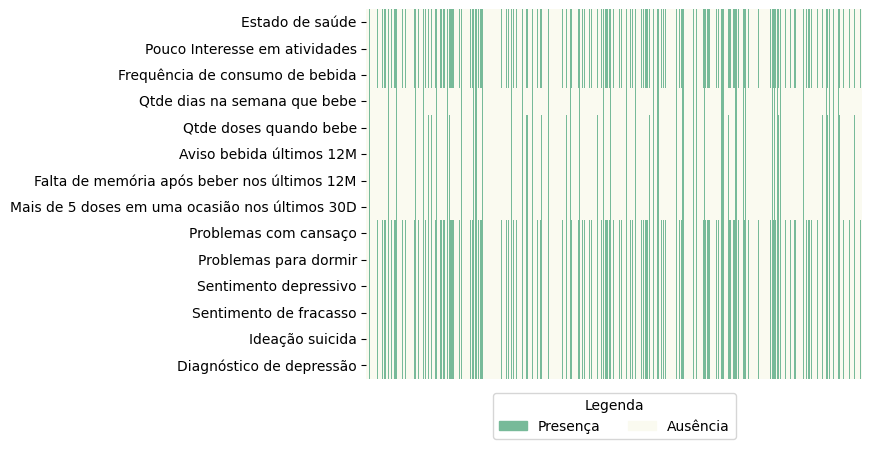

In [13]:
Heatmap(df)

In [14]:
# Filtros para buscar possível diagnóstico de não depressão

# Condição 1: Diagnóstico de depressão é nulo ou igual a 2.0
condicao1 = df['Diagnóstico de depressão'].isin([None, 2.0])

# Condição 2: Consumo de álcool é 1.0 ou 2.0
condicao2 = df['Frequência de consumo de bebida'].isin([1.0, 2.0])

# Condição 3: Sentimento depressivo é 1.0 ou 2.0
condicao3 = df['Sentimento depressivo'].isin([1.0, 2.0])

# Condição 4: Estado de saúde é igual a 1.0
condicao4 = df['Estado de saúde'] == 1.0

# Aplicando todas as condições de filtros para obter o DataFrame final
df_possivel_sem_depressao = df.loc[condicao1 & condicao2 & condicao3 & condicao4]

df_possivel_sem_depressao.shape

(8447, 14)

In [15]:
# Juntando dados de depressão e não depressão
condicao = df['Diagnóstico de depressão'] == 1.0
df_so_depressao = df.loc[condicao]

df_tratado = pd.concat([df_possivel_sem_depressao, df_so_depressao], axis=0)


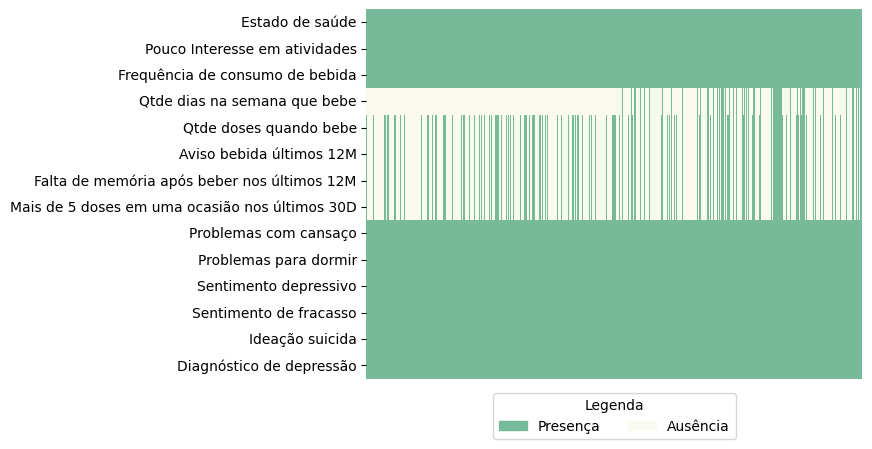

In [16]:
Heatmap(df_tratado)

In [17]:
count_df = df_tratado["Diagnóstico de depressão"].value_counts()
count_df

2.0    8447
1.0    8332
Name: Diagnóstico de depressão, dtype: int64

In [18]:
# Criando um DataFrame que nos dá o diagnóstico de alcoolismo
condicoes_homem = (
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Qtde doses quando bebe'] >= 15.0)) |
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Mais de 5 doses em uma ocasião nos últimos 30D'] == 1.0)) |
    ((df_tratado['Falta de memória após beber nos últimos 12M'].isin([3.0, 4.0, 5.0])) & (df_tratado['Qtde doses quando bebe'] >= 15.0))
)

condicoes_mulher = (
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Qtde doses quando bebe'] >= 8.0)) |
    ((df_tratado['Frequência de consumo de bebida'] == 3.0) & (df_tratado['Mais de 5 doses em uma ocasião nos últimos 30D'] == 1.0)) |
    ((df_tratado['Falta de memória após beber nos últimos 12M'].isin([3.0, 4.0, 5.0])) & (df_tratado['Qtde doses quando bebe'] >= 8.0))
)

df_tratado['Diagnóstico de alcoolismo'] = np.where(condicoes_homem | condicoes_mulher, 1, 0)

df_tratado['Diagnóstico de alcoolismo'] = df_tratado['Diagnóstico de alcoolismo'].astype(float)

counts = df_tratado['Diagnóstico de alcoolismo'].value_counts()
counts


0.0    15970
1.0      809
Name: Diagnóstico de alcoolismo, dtype: int64

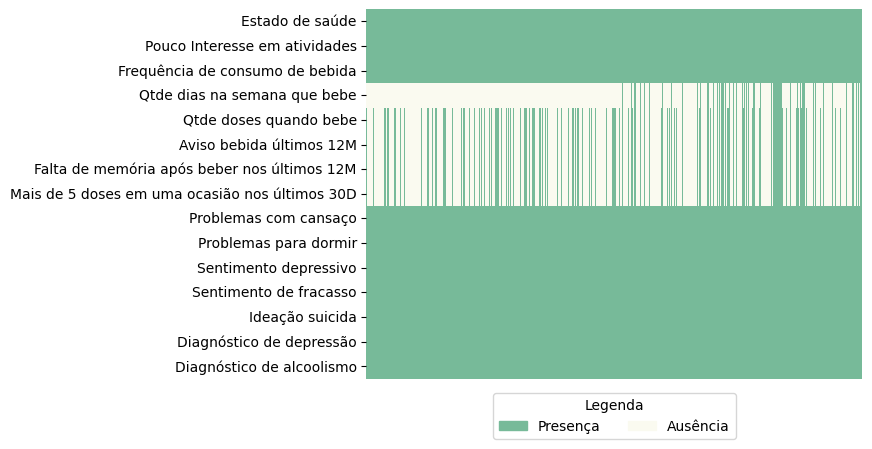

In [19]:
Heatmap(df_tratado)

In [20]:
df_tratado['Diagnóstico de alcoolismo'].value_counts()

0.0    15970
1.0      809
Name: Diagnóstico de alcoolismo, dtype: int64

In [21]:
count_df = df_tratado["Diagnóstico de depressão"].value_counts()
count_df

2.0    8447
1.0    8332
Name: Diagnóstico de depressão, dtype: int64

In [22]:
# Preenchendo com 0 os valores vazios
df_tratado.fillna(0, inplace=True)

In [24]:
# Trocando a ordem das colunas
ordenacao = ['Estado de saúde', 'Pouco Interesse em atividades', 'Frequência de consumo de bebida',
       'Qtde dias na semana que bebe', 'Qtde doses quando bebe',
       'Aviso bebida últimos 12M',
       'Falta de memória após beber nos últimos 12M',
       'Mais de 5 doses em uma ocasião nos últimos 30D',
       'Problemas com cansaço', 'Problemas para dormir',
       'Sentimento depressivo', 'Sentimento de fracasso', 'Ideação suicida',
       'Diagnóstico de alcoolismo', 'Diagnóstico de depressão']

In [25]:
df_depressao_e_alcoolismo = ((df_tratado['Diagnóstico de depressão'] == 1.0) & (df_tratado['Diagnóstico de alcoolismo'] >= 1.0)) 

In [26]:
# Criando uma nova coluna que diz se a pessoa tem alcoolismo e depressão
df_tratado ['Alcoolismo e Depressão'] = ((df_tratado['Diagnóstico de depressão'] == 1.0) & (df_tratado['Diagnóstico de alcoolismo'] >= 1.0)) 

In [27]:
a = df_tratado['Alcoolismo e Depressão'].value_counts()
a

False    15972
True       807
Name: Alcoolismo e Depressão, dtype: int64

In [28]:
# Trocando o valor de verdadeiro e falso para 0 e 1
df_tratado['Alcoolismo e Depressão'] = df_tratado['Alcoolismo e Depressão'].replace({True: 1.0, False: 0.0})

In [30]:
df_tratado['Diagnóstico de depressão'] = df_tratado['Diagnóstico de depressão'].replace(2, 0)

In [31]:
teste = df_tratado["Alcoolismo e Depressão"].value_counts()
teste

0.0    15972
1.0      807
Name: Alcoolismo e Depressão, dtype: int64

In [33]:
df_tratado.shape

(16779, 16)

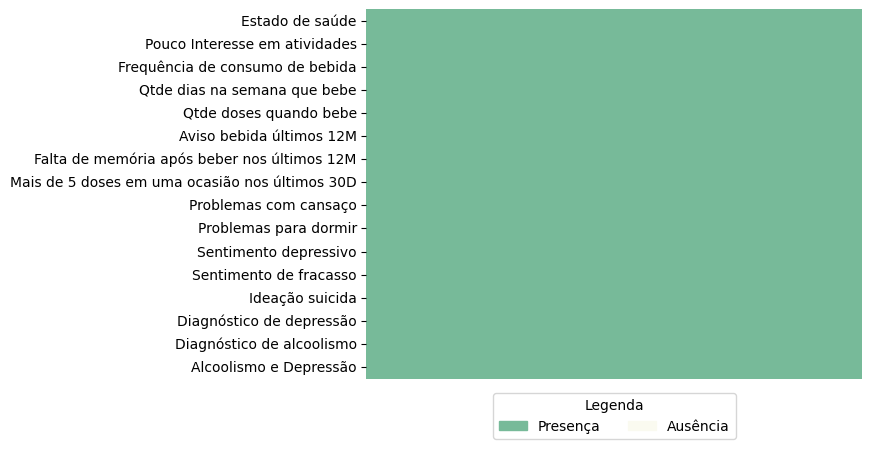

In [34]:
Heatmap(df_tratado)

In [35]:
teste = df_tratado["Diagnóstico de depressão"].value_counts()
teste

0.0    8447
1.0    8332
Name: Diagnóstico de depressão, dtype: int64

In [37]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16779 entries, 57 to 293718
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Estado de saúde                                 16779 non-null  float64
 1   Pouco Interesse em atividades                   16779 non-null  float64
 2   Frequência de consumo de bebida                 16779 non-null  float64
 3   Qtde dias na semana que bebe                    16779 non-null  float64
 4   Qtde doses quando bebe                          16779 non-null  float64
 5   Aviso bebida últimos 12M                        16779 non-null  float64
 6   Falta de memória após beber nos últimos 12M     16779 non-null  float64
 7   Mais de 5 doses em uma ocasião nos últimos 30D  16779 non-null  float64
 8   Problemas com cansaço                           16779 non-null  float64
 9   Problemas para dormir                

In [36]:
# Salvando arquivo reduzido como csv
df_tratado.to_csv(os.getcwd() + '/DATABASE/base-reduzida-v5.csv', sep=',', encoding='utf-8')